[View in Colaboratory](https://colab.research.google.com/github/rajagopalmotivate/DeepLearnIITMA1/blob/master/View_Occlusion_Sensitivity_Confidence_Plots.ipynb)

In [35]:
!wget "https://github.com/rajagopalmotivate/DeepLearnIITMA1/raw/master/mycifar_1B_model2101s.h5"
!wget "https://github.com/rajagopalmotivate/DeepLearnIITMA1/raw/master/cifar_1B_model3201s.h5"




Redirecting output to ‘wget-log.20’.

Redirecting output to ‘wget-log.21’.


In [0]:
from keras import backend as K
import tensorflow as tf
from keras import Input
from keras import layers
from keras import datasets
import numpy as np
from keras import utils
from keras.models import  Model
from keras.utils import plot_model
import keras
import os
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
import keras
from sklearn.metrics import classification_report
from decimal import Decimal
import  matplotlib.pyplot as plt
from scipy.misc import toimage
from keras.preprocessing.image import ImageDataGenerator
import copy
import numpy as np

import matplotlib.pyplot as plt
from keras.models import load_model



In [0]:
model1 = load_model('mycifar_1B_model2101s.h5')
model2 = load_model('cifar_1B_model3201s.h5')


In [0]:
#Find insights about a network such as how deep is the network, memorizationcapacity, generalizationcapacity, noofCNNs, kernalsize, amountofnonlinearity
def extractNetworkInsights(anetwork, verbose=0):
    #print('Analzing the Network insights')
    layercount = 0
    layercountCNN = 0
    for alayer in anetwork.layers:
      layercount = layercount + 1
      aconfig = alayer.get_config()
      if (verbose==0):
        print(str(aconfig) )
      if (verbose==1):  
        if 'CNN' in str(aconfig.get("name")):
          layercountCNN = layercountCNN + 1 
          print( str(layercount) + '   ' + str(aconfig.get("name") +  '   Filters=' + str(aconfig.get("filters") )))
        elif ('Pool' in str(aconfig.get("name"))):
          print( str(layercount) + '   ' + str(aconfig.get("name") +  '   PoolSize=' + str(aconfig.get("pool_size") )))
        elif 'dropout' in aconfig.get("name"):
          print( str(layercount) + '   ' + str(aconfig.get("name") +  '   Rate=' + str(aconfig.get("rate") )))
        elif 'Dense' in aconfig.get("name"):
          print( str(layercount) + '   ' + str(aconfig.get("name") +  '   Units=' + str(aconfig.get("units") )) )         
        else:
          print( str(layercount) + '   ' + str(aconfig.get("name")))
    return str(layercountCNN) + ' CNN layers'

In [39]:
extractNetworkInsights(model1, verbose=1)

1   1
2   CNNlayer1   Filters=32
3   batch_normalization_1
4   CNNlayer2   Filters=32
5   batch_normalization_2
6   MaxPool3   PoolSize=(2, 2)
7   dropout_1   Rate=0.0
8   CNNlayer4   Filters=64
9   batch_normalization_3
10   CNNlayer5   Filters=64
11   batch_normalization_4
12   MaxPool6   PoolSize=(1, 1)
13   dropout_2   Rate=0.0
14   CNNlayer7   Filters=128
15   batch_normalization_5
16   CNNlayer8   Filters=128
17   batch_normalization_6
18   MaxPool9   PoolSize=(1, 1)
19   dropout_3   Rate=0.0
20   Flatten10
21   Dense11   Units=64
22   dropout_4   Rate=0.2
23   Dense13   Units=32
24   dropout_5   Rate=0.2
25   DenseMultiClassSoftmaxLayer   Units=10


'6 CNN layers'

In [40]:
extractNetworkInsights(model2, verbose=1)

1   1
2   CNNlayer1   Filters=32
3   batch_normalization_1
4   CNNlayer2   Filters=32
5   batch_normalization_2
6   MaxPool3   PoolSize=(2, 2)
7   dropout_1   Rate=0.0
8   Flatten4
9   Dense5   Units=64
10   dropout_2   Rate=0.2
11   Dense7   Units=32
12   dropout_3   Rate=0.2
13   DenseMultiClassSoftmaxLayer   Units=10


'2 CNN layers'

In [0]:
(xtrain1, ytrain1), (xtest, ytest) = datasets.cifar10.load_data()
labelsnames =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
def showocculusionsenstivitySIGMOIDMODEL(myimageforconisderation, mygroundtruth, greboxsize, myloadedmodel):
    myimageth1 = myimageforconisderation
    groundtruth = mygroundtruth
    myimageJ = myimageth1.copy()
    ansThankyouF = myimageth1.copy()
    ansThankyouFA = myimageth1.copy()
    ansThankyouNANDRI = myimageth1.copy()
    ansThankyouNANDRI2 = myimageth1.copy()
    sampleocculusion = myimageth1.copy()
    print('Occulsion size is a sqaure of width ' + str(greboxsize*2+1))

    fig=plt.figure(figsize=(16, 16))
    columns = 3
    rows = 1
    #image dime is 0 to 31
    #5X5 grey box, hence move from 2 to 29
    for i in range(0, 32):
        for j in range(0,32):
            myimageJ = myimageth1.copy()
            myimageJ[i-greboxsize:i+greboxsize, j-greboxsize:j+greboxsize] = [127, 127, 127]        
            myimageJnormalized = myimageJ.astype('float16') * 1/255
            imageforprediction = np.expand_dims(myimageJnormalized, axis=0)
            result = myloadedmodel.predict(imageforprediction)
            y_classes = result[0].round(1).argmax(axis=-1)
            confidence = result[0][y_classes]*100
            #print(confidence)
            predictedlabel = y_classes
            grouthtruthlabel = groundtruth[0]
            if(predictedlabel == grouthtruthlabel):
                 ansThankyouF[i,j] = [0,  ansThankyouF[i,j, 1], 0]
                 ansThankyouFA[i,j] = [0, 250, 0]
                 ansThankyouNANDRI[i,j] = [ansThankyouNANDRI[i,j, 0], confidence * 200/100, ansThankyouNANDRI[i,j, 2]]
                 if(confidence>97):
                     ansThankyouNANDRI2[i,j] = [0,  confidence * 230/100, 0 ]
                 else:
                     ansThankyouNANDRI2[i,j] = [0, confidence * 200/100 , confidence * 200/100 ]
                # ansThankyouNANDRI[i,j] = [ansThankyouF[i,j, 0], confidence * 254/100, ansThankyouF[i,j, 2]]
                # ansThankyouNANDRI[i,j] = [0, confidence * 254/100, ansThankyouF[i,j, 2]
            else:
                ansThankyouFA[i,j] = [255, 0, 0]
                ansThankyouNANDRI[i,j]= [ (100-confidence) * 245/100, ansThankyouNANDRI[i,j, 1], ansThankyouNANDRI[i,j, 2]]
                ansThankyouNANDRI2[i,j] = [ (confidence) * 245/100,0, 0]
            if((i==10)&(j==10)):
                sampleocculusion = myimageJ


    #plt.title(str(j) + ' T: ' +  str(labelsnames[labelseq[0]]) +  ' P: ' +  str(labelsnames[y_classes[0]]) )

    fig.add_subplot(1, 5, 1)
    plt.imshow(sampleocculusion)
    fig.add_subplot(1, 5, 2)
    plt.imshow(ansThankyouFA)
    fig.add_subplot(1, 5, 3)
    plt.imshow(ansThankyouF)
    fig.add_subplot(1, 5, 4)
    plt.imshow(ansThankyouNANDRI)    
    fig.add_subplot(1, 5, 5)
    plt.imshow(ansThankyouNANDRI2)  
    plt.show()

Box size is 13


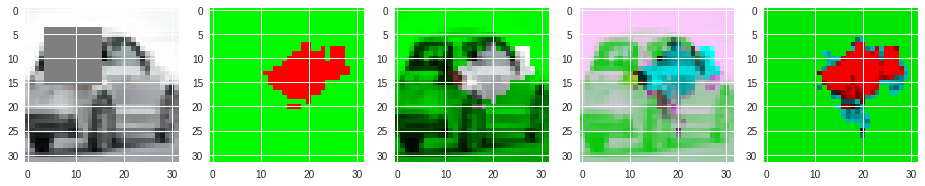

Box size is 13


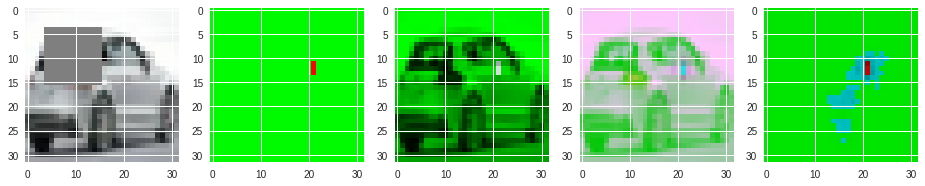

In [45]:
showocculusionsenstivitySIGMOIDMODEL(xtest[131], ytest[131], 6, model1)
showocculusionsenstivitySIGMOIDMODEL(xtest[131], ytest[131], 6, model2)


In [0]:
def getAccuracyWhenOcculded(myimageforconisderation, mygroundtruth, greboxsize, myloadedmodel):
    myimageth1 = myimageforconisderation
    groundtruth = mygroundtruth
    myimageJ = myimageth1.copy()
    ansThankyouF = myimageth1.copy()
    ansThankyouFA = myimageth1.copy()
    ansThankyouNANDRI = myimageth1.copy()
    ansThankyouNANDRI2 = myimageth1.copy()
    sampleocculusion = myimageth1.copy()
   # print('Occulsion size is ' + str(greboxsize*2+1))

    columns = 3
    rows = 1
    accurateprediction = 0
    wrongprediction = 0
    for i in range(0, 32):
        for j in range(0,32):
            myimageJ = myimageth1.copy()
            myimageJ[i-greboxsize:i+greboxsize, j-greboxsize:j+greboxsize] = [127, 127, 127]        
            myimageJnormalized = myimageJ.astype('float16') * 1/255
            imageforprediction = np.expand_dims(myimageJnormalized, axis=0)
            result = myloadedmodel.predict(imageforprediction)
            y_classes = result[0].round(1).argmax(axis=-1)
            confidence = result[0][y_classes]*100
            #print(confidence)
            predictedlabel = y_classes
            grouthtruthlabel = groundtruth[0]
            if(predictedlabel == grouthtruthlabel):
              accurateprediction = accurateprediction + 1 
            else:
              wrongprediction = wrongprediction + 1
    return accurateprediction, accurateprediction + wrongprediction 

In [44]:
result = myloadedmodel.predict(xtrain1[108:109].astype('float16') * 1/255)
print(result)
print(result[0].round(1))

[[3.7144367e-19 0.0000000e+00 1.0000000e+00 4.8730431e-20 1.5907469e-21
  3.5070101e-24 7.8994395e-22 1.6416125e-28 0.0000000e+00 0.0000000e+00]]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [47]:
print(getAccuracyWhenOcculded(xtest[131], ytest[131], 6, model1))

(893, 1024)


In [56]:
print(xtest.shape[0])

10000


In [0]:
def getAccuracyWhenOcculdedForaDataSet(testX, testY, greboxsize, myloadedmodel):
  accuratepredictioncount = 0 
  totalcount = 0 
  numberofimages = testX.shape[0]
  print('Analyzing number of artificially occuluded images ' + str(numberofimages))
  for i in range(numberofimages):
    perimageaccuracy, perimagetotal =  getAccuracyWhenOcculded(xtest[i], ytest[i], greboxsize, myloadedmodel)
    accuratepredictioncount = accuratepredictioncount + perimageaccuracy
    totalcount = perimagetotal + totalcount
  print('Total images explored is ' + str(totalcount))
  print('Total correct predictions inspite of occulusion  explored is ' + str(accuratepredictioncount))
  accuracypercentage = 100*accuratepredictioncount / totalcount
  print('occulusion is a sqaure of size  ' + str(greboxsize*2+1))
  print('Accuracy of prediction during this type of occulusion is ' + str(accuracypercentage))
  return accuracypercentage
  

In [0]:
def illustrateocculusionsenstivity(myloadedmodel, myimageforconisderation, mygroundtruth, greboxsize, stepsize = 4, isShowCorrectlyClassified=True):
    myimageth1 = myimageforconisderation
    groundtruth = mygroundtruth
    myimageJ = myimageth1.copy()
    ansThankyouF = myimageth1.copy()
    ansThankyouFA = myimageth1.copy()
    sampleocculusion = myimageth1.copy()
    print('Box size is ' + str(greboxsize*2+1))

    fig=plt.figure(figsize=(8, 8))
    columns = 6
    rows = 6
    Forplotingcorrectlypredictedplotindex = 1
    Forplotingwronglypredictedplotindex = 1
    Forplotingcurrentindex = 1
    
    
    #image dime is 0 to 31
    #5X5 grey box, hence move from 2 to 29
    for i in range(5, 32, stepsize):
        for j in range(5,32, stepsize):
            myimageJ = myimageth1.copy()
            Forplottingshowocculsion = myimageth1.copy()
            myimageJ[i-greboxsize:i+greboxsize, j-greboxsize:j+greboxsize] = [127, 127, 127]        
            myimageJnormalized = myimageJ.astype('float16') * 1/255
            imageforprediction = np.expand_dims(myimageJnormalized, axis=0)
            result = myloadedmodel.predict(imageforprediction, batch_size=1)
            y_classes = result.argmax(axis=-1)  
            predictedlabel = y_classes[0]
            grouthtruthlabel = groundtruth[0]
            if(predictedlabel == grouthtruthlabel):
                 ansThankyouF[i,j] = [0,  ansThankyouF[i,j, 1], 0]
                 ansThankyouFA[i,j] = [0, 250, 0]
                 Forplotingcurrentindex = Forplotingcorrectlypredictedplotindex
                 Forplotingcorrectlypredictedplotindex = Forplotingcorrectlypredictedplotindex + 1   
                 if(Forplotingcorrectlypredictedplotindex >= 24 ):
                        Forplotingcorrectlypredictedplotindex = 1   
                 if((isShowCorrectlyClassified)):
                    Forplottingshowocculsion[i-greboxsize:i+greboxsize, j-greboxsize:j+greboxsize]= [127, 127, 127]
                    fig.add_subplot(rows, columns, Forplotingcurrentindex)
                    plt.title(labelsnames[predictedlabel])
                    plt.axis('off')
                    plt.imshow(Forplottingshowocculsion)           
            else:
                ansThankyouFA[i,j] = [255, 0, 0]
                Forplotingcurrentindex = Forplotingwronglypredictedplotindex
                Forplotingwronglypredictedplotindex = Forplotingwronglypredictedplotindex + 1
                if(Forplotingwronglypredictedplotindex >= 24 ):
                    Forplotingwronglypredictedplotindex = 13  
                if((isShowCorrectlyClassified==False)):
                    Forplottingshowocculsion[i-greboxsize:i+greboxsize, j-greboxsize:j+greboxsize]= [127, 127, 127]
                    fig.add_subplot(rows, columns, Forplotingcurrentindex)
                    plt.title(labelsnames[predictedlabel], color='C4')
                    plt.axis('off')
                    plt.imshow(Forplottingshowocculsion)

                
            if((i==10)&(j==10)):
                sampleocculusion = myimageJ

    plt.show()


Box size is 11


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


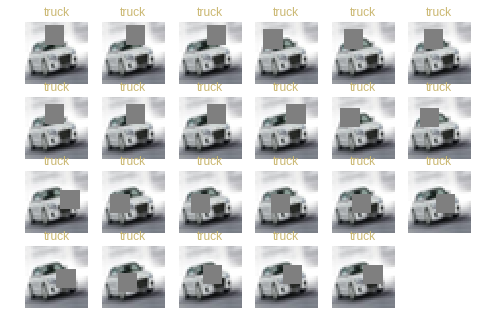

In [54]:
illustrateocculusionsenstivity(model1, xtrain1[119], ytrain1[119], 5, stepsize = 2, isShowCorrectlyClassified=False)


In [64]:
xtest = xtest[2:200]
xtest = xtest[2:200]
getAccuracyWhenOcculdedForaDataSet(xtest, xtest, 4, model2)

Analyzing number of artificially occuluded images 196


KeyboardInterrupt: ignored